# Description and Dataset Author

**Author: Ronan Pickwell**

Use this data for training custom LEGO object classification models. This highly realistic data is fully synthetic, and attempts to mimic photo-realism as closely as possible.

These images are in context, meaning objects are set in environments with random floor textures, random lighting conditions, and each image has the possibility of containing other LEGO parts, with occasional obstruction. This creates the opportunity to train an extremely robust model that is exposed to realistic expectations.

## FEATURES

✔ 200 Most Popular LEGO Parts

✔ 4,000 Images Per LEGO Part

✔ 800,000 Total Images

✔ 64x64 RGB Images

✔ In Context Images

This data was created through a mixed usage of the Blender Python API alongside many other Python packages including Matplotlib, Pillow, and PyAutoGUI.

## Special Thanks

* Brick Architect (https://brickarchitect.com) for knowledge and resources on LEGO parts and colors.

* LDraw (https://www.ldraw.org/) for 3D part models.*italicized text*

# Importing the Dataset

In [ ]:
# Download the lego dataset from kaggle 
!pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d ronanpickell/b200c-lego-classification-dataset

Saving kaggle.json to kaggle.json
 99% 1.11G/1.11G [00:15<00:00, 81.6MB/s]
100% 1.11G/1.11G [00:15<00:00, 76.0MB/s]


In [ ]:
import zipfile

!wget b200c-lego-classification-dataset.zip
# Unzip the data
zip = zipfile.ZipFile("b200c-lego-classification-dataset.zip")
zip.extractall()
zip.close()

--2021-08-18 22:32:17--  http://b200c-lego-classification-dataset.zip/
Resolving b200c-lego-classification-dataset.zip (b200c-lego-classification-dataset.zip)... failed: Name or service not known.
wget: unable to resolve host address ‘b200c-lego-classification-dataset.zip’


In [ ]:
! pip install split-folders tqdm

In [ ]:
import splitfolders
splitfolders.ratio("64", output="lego", seed=42, ratio=(.8, .1, .1))

Copying files: 800000 files [05:10, 2578.71 files/s]


In [ ]:
import os 

# Walk through the directory to confirm
for dirpath, dirnames, filenames in os.walk("lego/train"):
  print(f"Directories: {len(dirnames)} Images: {len(filenames)} in \t'{dirpath}'.")

Directories: 200 Images: 0 in 	'lego/train'.
Directories: 0 Images: 3200 in 	'lego/train/3039'.
Directories: 0 Images: 3200 in 	'lego/train/3034'.
Directories: 0 Images: 3200 in 	'lego/train/15573'.
Directories: 0 Images: 3200 in 	'lego/train/3245c'.
Directories: 0 Images: 3200 in 	'lego/train/2420'.
Directories: 0 Images: 3200 in 	'lego/train/85861'.
Directories: 0 Images: 3200 in 	'lego/train/32525'.
Directories: 0 Images: 3200 in 	'lego/train/4070'.
Directories: 0 Images: 3200 in 	'lego/train/63864'.
Directories: 0 Images: 3200 in 	'lego/train/99206'.
Directories: 0 Images: 3200 in 	'lego/train/3070b'.
Directories: 0 Images: 3200 in 	'lego/train/4085'.
Directories: 0 Images: 3200 in 	'lego/train/87083'.
Directories: 0 Images: 3200 in 	'lego/train/14719'.
Directories: 0 Images: 3200 in 	'lego/train/22885'.
Directories: 0 Images: 3200 in 	'lego/train/87079'.
Directories: 0 Images: 3200 in 	'lego/train/32073'.
Directories: 0 Images: 3200 in 	'lego/train/11458'.
Directories: 0 Images: 3

In [ ]:
# Obtain the classnames for each repsective lego
import pathlib
import numpy as np

data_path = pathlib.Path("lego/test")
class_names = np.array([item.name for item in data_path.glob("*")]) # Created a list of class_names from the subdirectories
print(class_names)

['3039' '3034' '15573' '3245c' '2420' '85861' '32525' '4070' '63864'
 '99206' '3070b' '4085' '87083' '14719' '22885' '87079' '32073' '11458'
 '85080' '88072' '4274' '22388' '87552' '3701' '3021' '6091' '6541'
 '62462' '15392' '48336' '2431' '32062' '3623' '25269' '3010' '99207'
 '3023' '32524' '3832' '32278' '64644' '4286' '26047' '43093' '6636'
 '93273' '3660' '3937' '15100' '11090' '4865' '49668' '4589' '40490'
 '32013' '26601' '2432' '24866' '48729' '6536' '11477' '41769' '30374'
 '88323' '85984' '3460' '32316' '3666' '3005' '41677' '2445' '3700'
 '32064' '3032' '3008' '60481' '28192' '4073' '3622' '47457' '2780' '3024'
 '99563' '3958' '60483' '3065' '32952' '3002' '20482' '3795' '3001'
 '14769' '60470' '60592' '3069b' '3003' '32607' '3031' '2654' '18654'
 '3710' '41770' '2877' '32184' '2540' '32000' '32140' '33909' '26604'
 '32526' '18677' '99780' '18674' '98138' '4081b' '6632' '3941' '3713'
 '61409' '15070' '60474' '11476' '32523' '2412b' '3749' '43723' '6134'
 '60479' '32028' '98

# Visualizing the data

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg
import random

def view_random_images(directory, num_img):
  """
  From a directory, takes random images that are divisible by 4 and displays them.
  For num_img: inputted 12, 16, 20 images are shown, but 14 images only show 12
  
  example: view_random_images("lego/test", 12) will show 12 random images from a random folder
  """
  # setting random folder from the class names and then placing the path of the folder
  rand_folder = random.choice(class_names)
  path = directory + "/" + rand_folder
  fig = plt.figure(figsize=(10, 10))
  plt.title(f"Lego featured from label: {rand_folder}")
  plt.axis(False)
  # placing a row and column to display the plots through a subplot
  col = 4
  row = int(num_img/col)
  for i in range(1, col*row+1):
    # get a random image path and read it into mpimg
    random_image_path = random.sample(os.listdir(path), 1)
    img = mpimg.imread(path + "/" + random_image_path[0])
    fig.add_subplot(row, col, i)
    plt.imshow(img)
    plt.axis(False)
  plt.show()

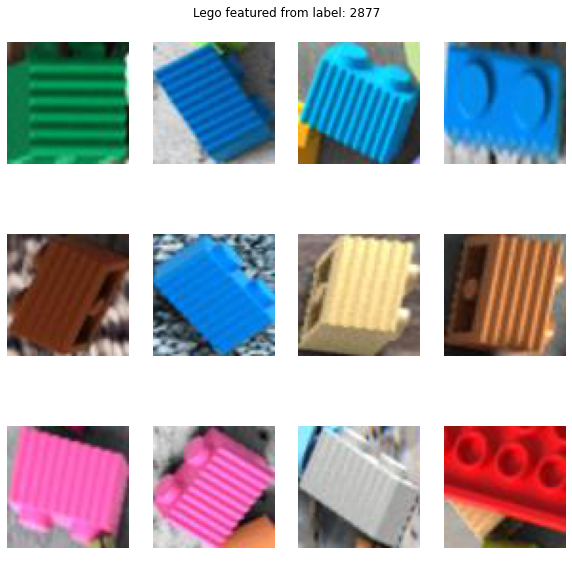

In [ ]:
view_random_images(directory="lego/test", 
                   num_img=12)

In [ ]:
# Setup the training, testing, and validation directories
train_dir = "lego/train/"
test_dir = "lego/test/"
val_dir = "lego/val/"

# Creating a baseline Convolutional Neural Network with baseline model

## Preprocess the data in order to prepare it for the model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_generation = ImageDataGenerator(rescale=1/255.)
test_data_generation = ImageDataGenerator(rescale=1/255.)
val_data_generation = ImageDataGenerator(rescale=1/255.)

In [ ]:
len(class_names)

200

In [ ]:
# Resize the image (normal shape of the image described by the author is 64x64, halfing the resolution should still maintain accuracy)
target_size = (32, 32)

# Load the data through flowing from the directory
# Note: batch size is set to default (32) and class mode is set to default (categorical)
train_data = train_data_generation.flow_from_directory(train_dir,
                                                       target_size)

test_data = test_data_generation.flow_from_directory(test_dir,
                                                     target_size)

val_data = val_data_generation.flow_from_directory(val_dir,
                                                   target_size)

# Note: One image was deleted since it was corrupted

Found 639999 images belonging to 200 classes.
Found 80000 images belonging to 200 classes.
Found 80000 images belonging to 200 classes.


## Create the baseline model

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

baseline_model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(20, 3, activation=tf.keras.activations.relu, input_shape=(32, 32, 3)),
  tf.keras.layers.Conv2D(20, 3, activation=tf.keras.activations.relu),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(20, 3, activation=tf.keras.activations.relu),
  tf.keras.layers.Conv2D(20, 3, activation=tf.keras.activations.relu),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(200, activation=tf.keras.activations.softmax)
])

baseline_model.compile(loss=tf.keras.losses.categorical_crossentropy,
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["accuracy"])

In [ ]:
os.remove("lego/train/10247/2260.jpg")

## Fit the baseline model

In [ ]:
history_baseline_model = baseline_model.fit(train_data,
                                            epochs=5,
                                            validation_data=val_data)

Epoch 1/5
20000/20000 [==============================] - 278s 14ms/step - loss: 2.9857 - accuracy: 0.2840 - val_loss: 2.4264 - val_accuracy: 0.3767
Epoch 2/5
20000/20000 [==============================] - 272s 14ms/step - loss: 2.2447 - accuracy: 0.4142 - val_loss: 2.1614 - val_accuracy: 0.4318
Epoch 3/5
20000/20000 [==============================] - 272s 14ms/step - loss: 2.0818 - accuracy: 0.4478 - val_loss: 2.0816 - val_accuracy: 0.4487
Epoch 4/5
20000/20000 [==============================] - 272s 14ms/step - loss: 1.9847 - accuracy: 0.4704 - val_loss: 1.9922 - val_accuracy: 0.4662
Epoch 5/5
20000/20000 [==============================] - 272s 14ms/step - loss: 1.9159 - accuracy: 0.4850 - val_loss: 1.9599 - val_accuracy: 0.4751


In [ ]:
# Plot the validation and training curves
def plot_loss_curves(history):
  """
  returns separate loss curves for training and validation metrics
  """
  # Separate variables
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="validation_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="validation_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

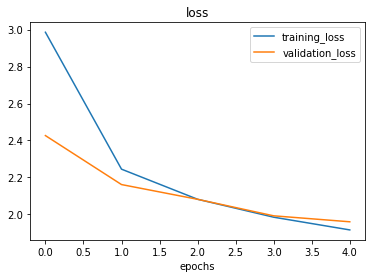

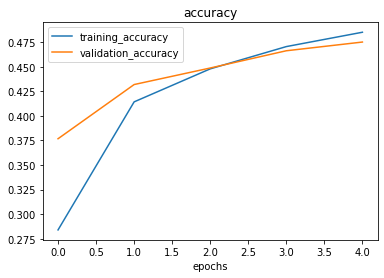

In [ ]:
plot_loss_curves(history_baseline_model)